In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import requests
from io import BytesIO
from PIL import Image

In [63]:
np.random.seed(42)
n_samples = 200

In [64]:
# Generating data for eleptical galaxies. Characteristics include smoother, more circular, high light concentration in the center, and symetrical
elliptical_galaxies = pd.DataFrame({
    'concentration': np.random.normal(0.8, 0.1, n_samples//2),
    'asymmetry': np.random.normal(0.2, 0.1, n_samples//2),
    'smoothness': np.random.normal(0.7, 0.15, n_samples//2),
    'ellipticity': np.random.normal(0.3, 0.2, n_samples//2),
    'type': 'elliptical'
})

In [65]:
#Generating data for spiral galaxies. Characteristics include, more structured, less smooth, more light around the disks, less symmetrical
spiral_galaxies = pd.DataFrame({
    'concentration': np.random.normal(0.5, 0.15, n_samples//2),
    'asymmetry': np.random.normal(0.4, 0.15, n_samples//2),
    'smoothness': np.random.normal(0.3, 0.1, n_samples//2),
    'ellipticity': np.random.normal(0.6, 0.15, n_samples//2),
    'type': 'spiral'
})

In [66]:
#Combine datasets
galaxies = pd.concat([elliptical_galaxies, spiral_galaxies]).reset_index(drop=True)

In [67]:
print(galaxies.head())

   concentration  asymmetry  smoothness  ellipticity        type
0       0.849671   0.058463    0.753668     0.134201  elliptical
1       0.786174   0.157935    0.784118     0.187964  elliptical
2       0.864769   0.165729    0.862458     0.449459  elliptical
3       0.952303   0.119772    0.858070     0.422074  elliptical
4       0.776585   0.183871    0.493350     0.295820  elliptical


In [68]:
print(f"Total galaxies: {len(galaxies)}")

Total galaxies: 200


In [69]:
print(f"Total elliptical galaxies: {len(galaxies[galaxies['type'] == 'elliptical'])}")

Total elliptical galaxies: 100


In [70]:
print(f"Total spiral galaxies: {len(galaxies[galaxies['type'] == 'spiral'])}")

Total spiral galaxies: 100


In [71]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

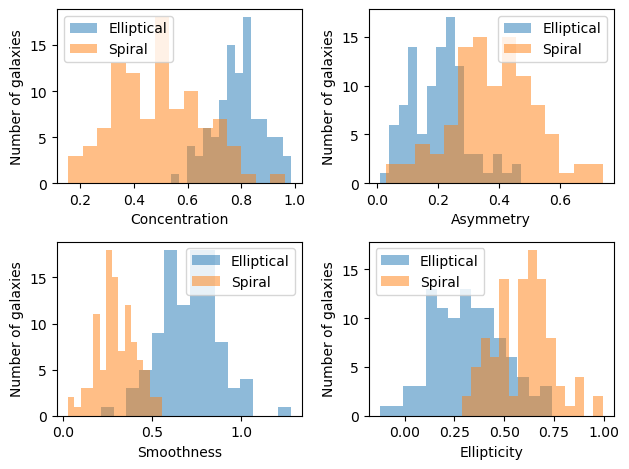

In [72]:
feature_names = ['concentration', 'asymmetry', 'smoothness', 'ellipticity']
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)

    plt.hist(
        galaxies[galaxies['type'] == 'elliptical'][feature],
        alpha = 0.5,
        bins = 15,
        label = 'Elliptical'
    )

    plt.hist(
        galaxies[galaxies['type'] == 'spiral'][feature],
        alpha = 0.5,
        bins = 15,
        label = 'Spiral'
    )

    plt.xlabel(feature.capitalize())
    plt.ylabel('Number of galaxies')
    plt.legend()

plt.tight_layout()
plt.savefig('galaxy_features.png')

In [73]:
#Converting galaxy types to numerical labels
galaxies['label'] = galaxies['type'].map({'elliptical' : 0, 'spiral' : 1})

X = galaxies[feature_names]
y = galaxies['label']

In [74]:
#Train and testing splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

In [75]:
#Scale the features to have mean = 0 and varience = 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {len(X_train)} galaxies")
print(f"Training set size: {len(X_test)} galaxies")

Training set size: 150 galaxies
Training set size: 50 galaxies


In [76]:
#Create and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [77]:
#Make predictions
y_pred = model.predict(X_test_scaled)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2%}")

Model accuracy: 100.00%


In [79]:
#Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nReading the confusion matrix:")
print(f"True ellipticals galaxies correctly identified: {cm[0][0]}")
print(f"True spiral galaxies correctly identified: {cm[1][1]}")
print(f"Elliptical galaxies incorrectly identified as spirals: {cm[0][1]}")
print(f"Spiral galaxies incorrectly identified as ellipticals: {cm[1][0]}")


Confusion Matrix:
[[27  0]
 [ 0 23]]

Reading the confusion matrix:
True ellipticals galaxies correctly identified: 27
True spiral galaxies correctly identified: 23
Elliptical galaxies incorrectly identified as spirals: 0
Spiral galaxies incorrectly identified as ellipticals: 0


In [80]:
# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

In [81]:
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i+1}. {feature_names[indices[i]]} ({importances[indices[i]]:.4f})")

Feature ranking:
1. smoothness (0.4913)
2. concentration (0.2871)
3. asymmetry (0.1144)
4. ellipticity (0.1073)


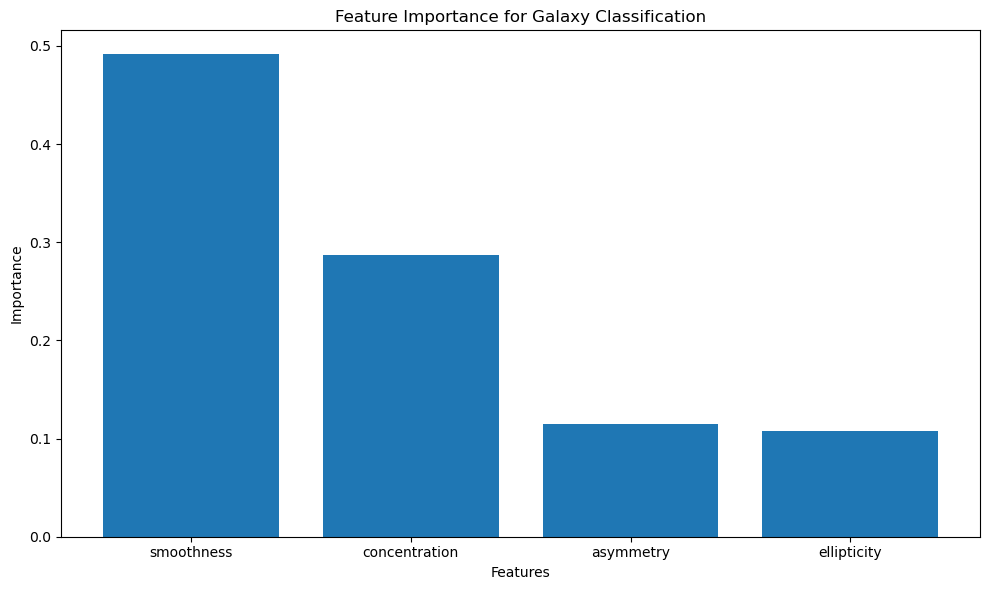

In [82]:
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Galaxy Classification')
plt.tight_layout()
plt.savefig('feature_importance.png')

In [83]:
#URL for galaxy examples
galaxy_examples = [
    {
       'type': 'Elliptical',
       'name': 'NGC 4150',
       'url': 'https://cdn.esahubble.org/archives/images/screen/opo1038b.jpg',
       'description': 'NGC 4150 is a typical elliptical galaxy with heavy light concentration in the center and very smooth'
    },
    {
        'type': 'Spiral',
        'name': 'M61',
        'url': 'https://cdn.esahubble.org/archives/images/screen/potw2114a.jpg',
        'description': 'M61 is a classic example of a spiral galaxy with light scattered across the galaxy and not very smooth'
    } 
]

In [84]:
# Display galaxy info and try to download images
for i, galaxy in enumerate(galaxy_examples):
    print(f"\nExample {i+1}: {galaxy['name']} ({galaxy['type']} galaxy)")
    print(f"Description: {galaxy['description']}")
    print(f"Image URL: {galaxy['url']}")

    try:
        response = requests.get(galaxy['url'])
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            img.save(f"{galaxy['name'].replace(' ', '_')}.jpg")
            print(f"Image saved as {galaxy['name'].replace(' ', '_')}.jpg")
    except Exception as e:
        print(f'Could not download image: {e}')


Example 1: NGC 4150 (Elliptical galaxy)
Description: NGC 4150 is a typical elliptical galaxy with heavy light concentration in the center and very smooth
Image URL: https://cdn.esahubble.org/archives/images/screen/opo1038b.jpg
Image saved as NGC_4150.jpg

Example 2: M61 (Spiral galaxy)
Description: M61 is a classic example of a spiral galaxy with light scattered across the galaxy and not very smooth
Image URL: https://cdn.esahubble.org/archives/images/screen/potw2114a.jpg
Image saved as M61.jpg


In [92]:
#Creating function to classify new galaxies
def classify_galaxy(concentration, asymmetry, smoothness, ellipticity):
    """
    Classify a galaxy as elliptical or spiral based on its features

    Parameters:
    ------
    concentration: float
        How concentrated the galaxy's light is toward the center (0-1)
    asymmetry: float
        How asymmetric the galaxy appears (0-1)
    smoothness: float
        How smooth the galaxy's light distribution is (0-1)
    ellipticity: float
        How elliptical/elongated the galaxy appears (0-1)

    Returns:
    ------
    galaxy_type: str
        'Elliptical' or 'Spiral'
    probability: float
        Confidence in the classification (0-1)
    """
    # Create feature DataFrame with the same column names used during training
    features_df = pd.DataFrame({
        'concentration': [concentration],
        'asymmetry': [asymmetry], 
        'smoothness': [smoothness],
        'ellipticity': [ellipticity]
    })
    
    # Scale the features using the same scaler that was fitted during training
    features_scaled = scaler.transform(features_df)
    
    # Predict galaxy type
    galaxy_class = model.predict(features_scaled)[0]
    
    # Get probability
    probs = model.predict_proba(features_scaled)[0]
    
    # Convert results to more readable format
    galaxy_type = 'Elliptical' if galaxy_class == 0 else 'Spiral'
    probability = probs[galaxy_class]
    
    return galaxy_type, probability

In [93]:
# Test the function with some example galaxies
print("\nTesting our galaxy classifier with examples:")

test_galaxies = [
    {
        'name': "Typical Elliptical Galaxy",
        "features": {
            "concentration": 0.85,
            "asymmetry": 0.15,
            "smoothness": 0.75,
            "ellipticity": 0.25
        }
    },
    {
        "name": "Typical Spiral Galaxy",
        "features": {
            "concentration": 0.45,
            "asymmetry": 0.5,
            "smoothness": 0.3,
            "ellipticity": 0.65
        }
    },
    {
        "name": "Mystery Galaxy",
        "features": {
            "concentration": 0.6,
            "asymmetry": 0.35,
            "smoothness": 0.55,
            "ellipticity": 0.45
        }
    }
]

for galaxy in test_galaxies:
    features = galaxy["features"]
    galaxy_type, probability = classify_galaxy(
        features["concentration"], 
        features["asymmetry"],
        features["smoothness"], 
        features["ellipticity"]
    )
    
    print(f"\n{galaxy['name']}:")
    print(f"Features: {features}")
    print(f"Classification: {galaxy_type} galaxy")
    print(f"Confidence: {probability:.2%}")


Testing our galaxy classifier with examples:

Typical Elliptical Galaxy:
Features: {'concentration': 0.85, 'asymmetry': 0.15, 'smoothness': 0.75, 'ellipticity': 0.25}
Classification: Elliptical galaxy
Confidence: 100.00%

Typical Spiral Galaxy:
Features: {'concentration': 0.45, 'asymmetry': 0.5, 'smoothness': 0.3, 'ellipticity': 0.65}
Classification: Spiral galaxy
Confidence: 100.00%

Mystery Galaxy:
Features: {'concentration': 0.6, 'asymmetry': 0.35, 'smoothness': 0.55, 'ellipticity': 0.45}
Classification: Elliptical galaxy
Confidence: 51.00%
